In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv(r"/Users/loganmorales/Desktop/Comodo_Seckin/netflow_day-02.csv",sep=",",index_col=False, nrows=500)

In [3]:
data.head(500)

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0
5,118785,63173,IP564116,Comp141988,17,5060,5060,7061,0,5745536,0
6,118785,78594,IP564116,Comp141988,17,5060,5060,8638,0,7052947,0
7,118785,90763,IP564116,Comp141988,17,5060,5060,9943,0,8105139,0
8,118785,104427,IP564116,Comp141988,17,5060,5060,11544,0,9398696,0
9,118785,115677,IP564116,Comp141988,17,5060,5060,13011,0,10586412,0


In [4]:
X = data[['srcPackets','dstPackets','srcBytes','dstBytes']]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [6]:
X_normalized.columns = ['srcPackets','dstPackets','srcBytes','dstBytes']

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

In [44]:
centers = kmeans.cluster_centers_
print('Cluster centers of columns:\n')
print(pd.DataFrame(centers,columns= ['srcPackets','dstPackets','srcBytes','dstBytes']))

Cluster centers of columns:

   srcPackets  dstPackets  srcBytes  dstBytes
0    0.005119    0.001743  0.008336  0.005265
1    0.999883    0.999991  0.999874  0.999962


# Implementing Elbow Method

In [9]:
from sklearn import metrics
from scipy.spatial.distance import cdist

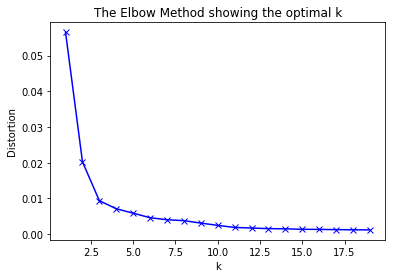

In [10]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_normalized)
    kmeanModel.fit(X_normalized)
    distortions.append(sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_normalized.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Average Silhouette Method

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [12]:
cluster_range = range( 2, 10 )

for n_clusters in cluster_range:
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( X_normalized )

  silhouette_avg = silhouette_score(X_normalized, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

  # Compute the silhouette scores for each sample
  sample_silhouette_values = silhouette_samples(X_normalized, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.9854495827150986
For n_clusters = 3 The average silhouette_score is : 0.9583904358847489
For n_clusters = 4 The average silhouette_score is : 0.9569079168895182
For n_clusters = 5 The average silhouette_score is : 0.9454365395744844
For n_clusters = 6 The average silhouette_score is : 0.9237159391862906
For n_clusters = 7 The average silhouette_score is : 0.9269644731945211
For n_clusters = 8 The average silhouette_score is : 0.9275914801782458
For n_clusters = 9 The average silhouette_score is : 0.8802480609333997


# Mean-Shift Clustering

In [13]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 12


# Gaussian Mixture Models

In [14]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 12


# New column

In [19]:
dataCopy = data

In [43]:
labels = kmeans.labels_
dataCopy['clusters'] = labels
X2 = ['srcPackets','dstPackets','srcBytes','dstBytes', 'clusters']

In [37]:
dataCopy.head()

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes,clusters
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018,0
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408,0
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0,0


In [40]:
dataCopy.ix[310]

time               119169
duration            14275
srcDevice      Comp004479
dstDevice      Comp274690
protocol                6
srcPort         Port17617
dstPort              2049
srcPackets       84515677
dstPackets      588887960
srcBytes       8197543524
dstBytes      22300992620
clusters                0
Name: 310, dtype: object

In [41]:
dataCopy.ix[312]

time               119169
duration            46850
srcDevice      Comp004479
dstDevice      Comp274690
protocol                6
srcPort         Port17617
dstPort              2049
srcPackets      188012056
dstPackets     1106026322
srcBytes      18243509496
dstBytes      45576786992
clusters                1
Name: 312, dtype: object

In [35]:
print (dataCopy[X2].groupby(['clusters']).mean())

            srcPackets    dstPackets      srcBytes      dstBytes
clusters                                                        
0         9.626834e+05  1.927286e+06  1.521023e+08  2.399981e+08
1         1.880244e+08  1.106032e+09  1.824479e+10  4.557780e+10


In [45]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 